# Lecture 18: Spectral Analysis


In [2]:
import numpy as np
with open('signal.dat') as f:
    signal = np.array([ float(x) for x in f.read().split() ])

**Spectral analysis** is the task of analyzing a short snippet of signal, in order to find out what sinusoids it contains.

Spectral analysis is often  used, for example, to study the chemical composition of some material sample (or of a distant supernova, or of a section of atmosphere).  The way we do it is to heat the material, and then measure the electromagnetic signals  it emits while it's heating. Any pure sinusoid, at any particular frequency, denotes the presence of some atom that has an oscillation at that frequency. 

The big problem is that some of the sinusoids will be 20dB or even 60dB higher in amplitude than others.  That  makes it hard to determine exactly  which sinusoids are present.

For example, consider the following signal.  This signal is made of exactly 5 sinusoids:

$$x[n]=\sum_{q=1}^5 a_q \cos(\omega_q n+\theta_q)$$

The task for today will be to try to identify those five frequencies, $\omega_1$ through $\omega_5$, from the 64-sample snippet of the signal that we have available.

64

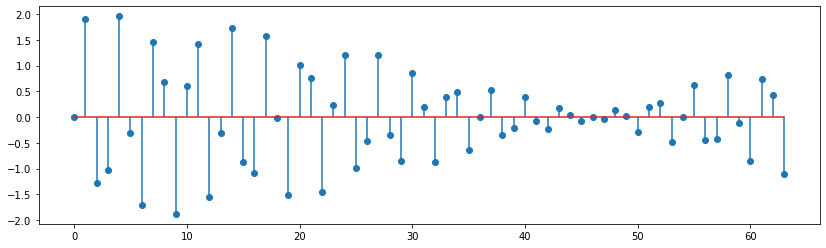

In [3]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(14,4))
axs.stem(signal)
len(signal)

#### What's that?

This is a 64-sample signal, with an obvious **beat frequency** of about 64 samples.  So we can see that it probably is something like 

$$x[n]=\cos(\omega_1 n)+\cos(\omega_2 n)?~~~\omega_2=\omega_1+\frac{2\pi}{64}$$

Actually, this signal is the sum of **five sinusoids**, at five different frequencies, with five different amplitudes:

$$x[n] = \sum_{q=1}^5 a_q \cos(\omega_q n+\theta_q)$$

Some of the sinusoids have much lower amplitude, though, so we'll need to use clever application of windows in order to find all of their frequencies. 

## 1. Discrete Fourier Transform

So far, we have learned the **discrete-time Fourier transform (DTFT)**.  It looks like this:

$$X(\omega)  = \sum_{n=-\infty}^\infty x[n]e^{-j\omega n},~~~0\le\omega < 2\pi$$

Now we will learn the **discrete Fourier transform (DFT)**.  It looks like this:

$$X[k] = \sum_{n=0}^{N-1} x[n]e^{-j\frac{2\pi kn}{N}},~~~0\le k\le N-1$$

Notice that there are only two differences between the DFT and  the DTFT:

1. **Finite length in time:** The DFT assumes that the input signal is only $N$ samples long.
2. **Sampled in frequency:** Because the input only has $N$ independent numbers ($x[0]$ through $x[n_1]$), it's only really meaningful to calculate $N$ different samples in the frequency domain ($X[0]$ through $X[k]$).  So, basically, the DFT is a sampled version of the DTFT:

$$X[k] = X(\omega_k),~~\omega_k = \frac{2\pi k}{N}$$

The DFT is the only Fourier transform that is discrete in **both time and frequency**, so it is the only Fourier transform that we can  compute on a computer.

We can simulate a DTFT on a computer, however, by **zero-padding** the input signal.  This leaves a finite-length signal, but it makes $N$ much larger, so that we get a lot more samples in the frequency domain.

Here is a comparison between the 64-sample DFT of **signal**, and its 320-sample DFT.  The 320-sample DFT can be considered similar to its DTFT.  By plotting these two things together, we can see that the **DFT = samples of the DTFT in frequency**.  

We will plot the magnitude DFT, and the log-magnitude DFT.  The log-magnitude DFT allows us to learn more about low-amplitude samples.

N is  64


Text(0.5, 1.0, 'Signal, zero-padded to $5N=320$ samples in length')

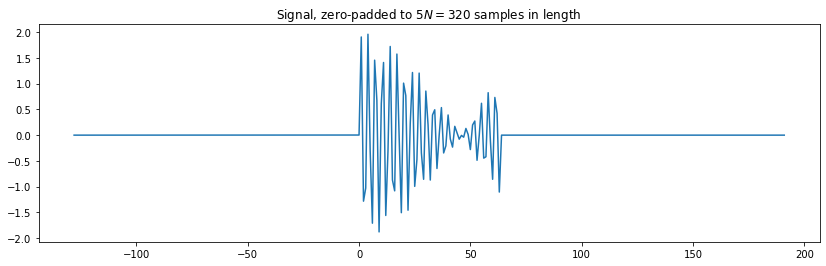

In [5]:
N = len(signal)
print('N is ',N)
n_axis = np.arange(-2*N,3*N)
zero_padded_signal = np.concatenate((np.zeros(N),np.zeros(N),signal,np.zeros(N),np.zeros(N)))
fig,axs = plt.subplots(figsize=(14,4))
axs.plot(n_axis,zero_padded_signal)
axs.set_title('Signal, zero-padded to $5N=320$ samples in length')

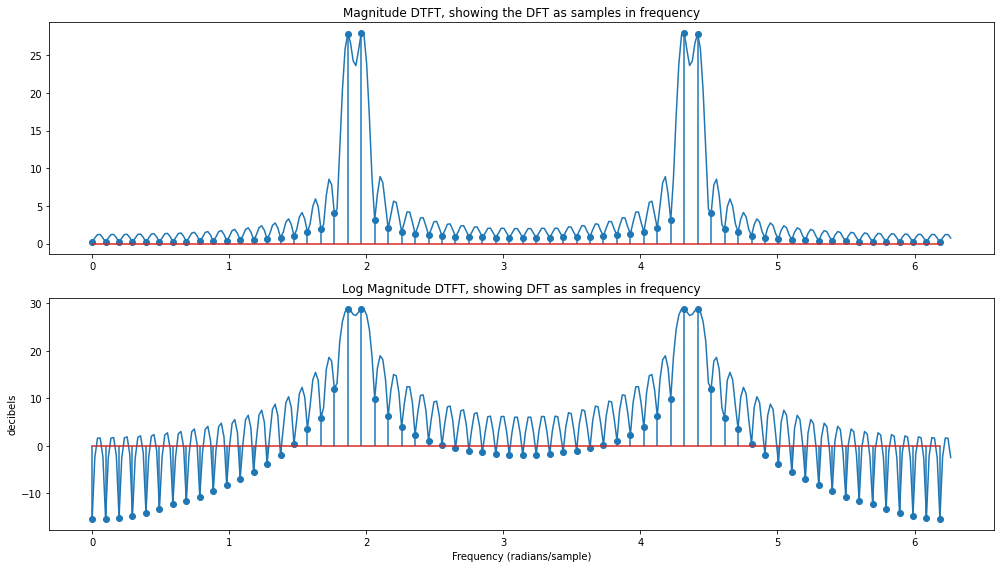

In [6]:
omega = np.linspace(0,2*np.pi,5*N,endpoint=False)
omega_k = np.linspace(0,2*np.pi, N, endpoint=False)
absDTFT = np.abs(np.fft.fft(zero_padded_signal))
absDFT = np.abs(np.fft.fft(signal))
fig,axs = plt.subplots(2,1,figsize=(14,8))
axs[0].plot(omega,absDTFT)
axs[0].stem(omega_k,absDFT)
axs[0].set_title('Magnitude DTFT, showing the DFT as samples in frequency')
axs[1].plot(omega,20*np.log10(np.maximum(0.001,absDTFT)))
axs[1].stem(omega_k, 20*np.log10(np.maximum(0.001,absDFT)))
axs[1].set_title('Log Magnitude DTFT, showing DFT as samples in frequency')
axs[1].set_ylabel('decibels')
axs[1].set_xlabel('Frequency (radians/sample)')
fig.tight_layout()

From this view, we can see clearly that the first two sinusoids are at exactly $k=19$ and $k=20$, i.e., 

$$\omega_1 = \frac{2\pi 19}{64},~~~\omega_2=\frac{2\pi 20}{64}$$

The levels of these two tones are both about +30dB, so their coefficients are something like

$$a_1 = a_2 = 10^{30/20}$$

But none of the other sinusoids are visible at all.  All of the other sinusoids are masked by the sidelobes of the windowing function.  In order to find the other sinusoids, we need to learn more about the sidelobes of the windowing function.

## 2. Rectangular Window

If we take the DTFT of a short signal, that's the same thing as taking the DTFT of a long signal multiplied by a rectangular window:

$$w_R[n] = \begin{cases}1&0\le n\le N-1\\0&\mbox{otherwise}\end{cases}$$

Text(0.5, 1.0, 'Rectangular Window of length $N=64$')

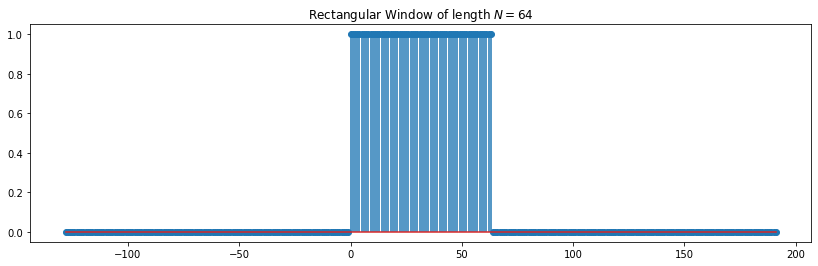

In [7]:
N = len(signal)
w_R = np.ones(N)
w_R_zp = np.concatenate((np.zeros(N),np.zeros(N),np.ones(N),np.zeros(N),np.zeros(N)))
n_axis = np.arange(-2*N, 3*N)
fig, axs = plt.subplots(figsize=(14,4))
axs.stem(n_axis, w_R_zp)
axs.set_title('Rectangular Window of length $N=64$')

We've already calculated the DTFT of a rectangular window a few times.  It is

$$W_R(\omega) = \sum_{n=-\infty}^\infty w_R[n]e^{-j\omega n}=\sum_{n=0}^{N-1}e^{-j\omega n} = e^{-j\omega\frac{N-1}{2}} \frac{\sin(\omega N/2)}{\sin(\omega/2)}$$

The real-valued part of that is called the "Dirichlet form."  It's very much like a sinc function, except that it's periodic, with a period of $2\pi$. 

$$D_N(\omega) = \frac{\sin(\omega N/2)}{\sin(\omega/2)}\approx \frac{\sin(\omega N/2)}{\omega/2}$$

Among other things, we can see that

$$D_N(\omega) \approx \begin{cases} N&\omega=0\\\frac{N}{2}&\omega=\frac{\pi}{N}\\0&\omega=\frac{2\pi}{N}\\-\frac{2N}{3\pi}&\omega=\frac{3\pi}{N}\\0&\omega=\frac{4\pi}{N}\\\frac{2N}{5\pi}&\omega=\frac{5\pi}{N}\\\vdots & \vdots\end{cases}$$

The sidelobes are not  exactly $-2N/3\pi$, $2N/5\pi$, $-2N/7\pi$ and so on, but they're pretty close.  Notice that $2N/3\pi$ is a really large number, for something that we would really prefer to be zero.

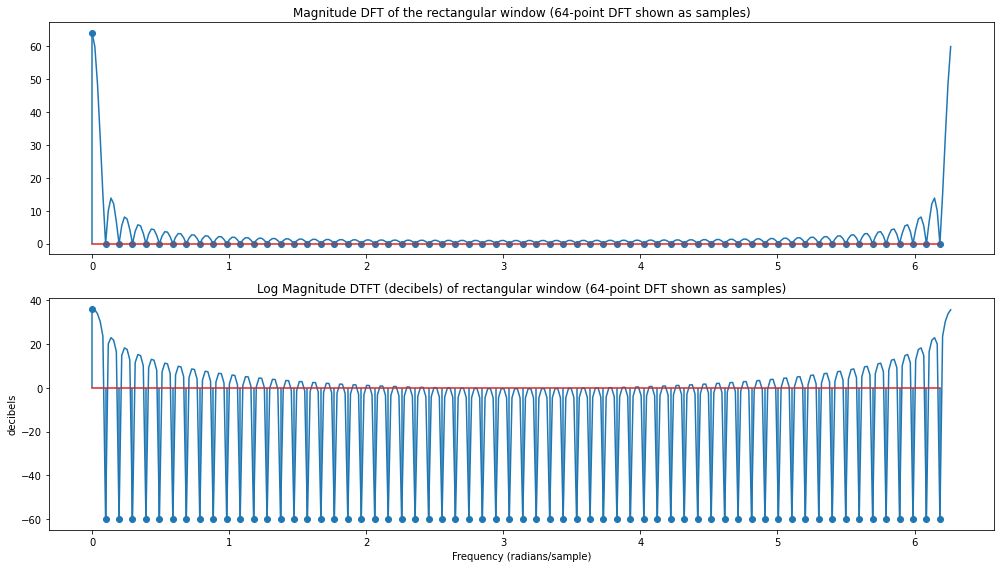

In [9]:
W_R_DTFT = np.abs(np.fft.fft(w_R_zp))
W_R_DFT = np.abs(np.fft.fft(w_R))
fig, axs = plt.subplots(2,1,figsize=(14,8))
axs[0].plot(omega, W_R_DTFT)
axs[0].stem(omega_k, W_R_DFT)
axs[0].set_title('Magnitude DFT of the rectangular window (64-point DFT shown as samples)')
axs[1].plot(omega, 20*np.log10(np.maximum(0.001,W_R_DTFT)))
axs[1].stem(omega_k, 20*np.log10(np.maximum(0.001, W_R_DFT)))
axs[1].set_title('Log Magnitude DTFT (decibels) of rectangular window (64-point DFT shown as samples)')
axs[1].set_ylabel('decibels')
axs[1].set_xlabel('Frequency (radians/sample)')
fig.tight_layout()

We've already seen how the sidelobes of a rectangular window make it *really, really hard* to identify low-amplitude sinusoidal components in your input signal.  

In the real world, this problem shows up most frequently when people are trying to measure the chemical composition of a sample of some material, or the chemical composition of a distant galaxy.  The small-amplitude sine waves  that signal presence of some chemical compound might be **completely masked** by the sidelobes of the rectangular window.

Here's that calculation again.  This plot is exactly the same as the one you saw up above.

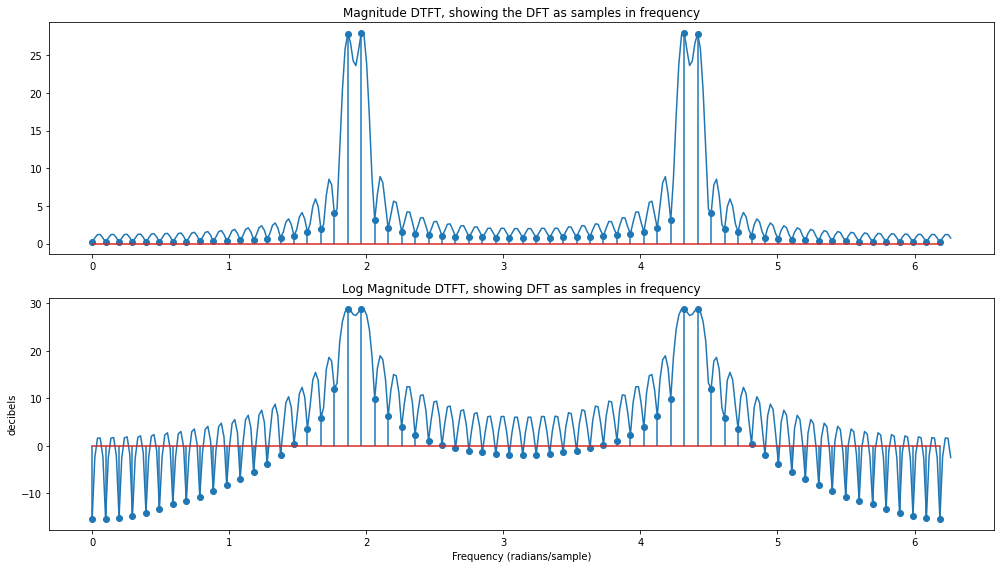

In [10]:
omega = np.linspace(0,2*np.pi,5*N,endpoint=False)
omega_k = np.linspace(0,2*np.pi, N, endpoint=False)
absDTFT = np.abs(np.fft.fft(zero_padded_signal))
absDFT = np.abs(np.fft.fft(signal))
fig,axs = plt.subplots(2,1,figsize=(14,8))
axs[0].plot(omega,absDTFT)
axs[0].stem(omega_k,absDFT)
axs[0].set_title('Magnitude DTFT, showing the DFT as samples in frequency')
axs[1].plot(omega,20*np.log10(np.maximum(0.001,absDTFT)))
axs[1].stem(omega_k, 20*np.log10(np.maximum(0.001,absDFT)))
axs[1].set_title('Log Magnitude DTFT, showing DFT as samples in frequency')
axs[1].set_ylabel('decibels')
axs[1].set_xlabel('Frequency (radians/sample)')
fig.tight_layout()

## 3. Hamming  window

The Hamming window was designed with the following idea:

$$w_H[n] = \begin{cases}a + b\cos\left(\frac{2\pi n}{N-1}\right)&0\le n\le N-1\\0&\mbox{otherwise}\end{cases}$$

$$a,b = \arg\min \left|W_H\left(\omega=\frac{3\pi}{N}\right)\right|$$

In words, the coefficients in the Hamming  window are chosen in order to minimize the amplitude of the **first** sidelobe.  The resulting coefficients are

$$w_H[n] = 0.54 - 0.46\cos\left(\frac{2\pi n}{N-1}\right)$$

The main lobe now has a half-width of $4\pi/N$, and the first sidelobe  is at $5\pi/N$, and the resulting sidelobe amplitude is 

$$\left|W_H\left(\frac{5\pi}{N}\right)\right| = 0.006,~~~20\log_{10}\left|W_H\left(\frac{5\pi}{N}\right)\right|=-44\mbox{dB}$$

Text(0.5, 1.0, 'Hamming window, zero-padded to a length of $5N$')

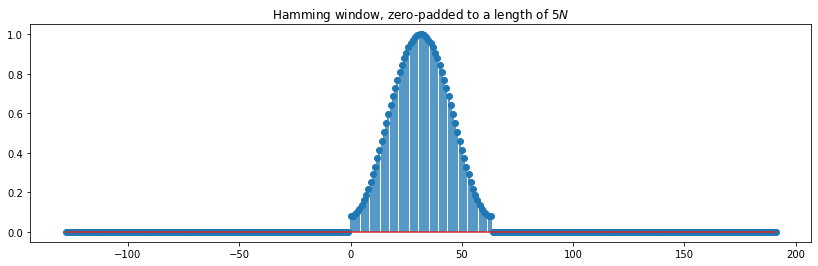

In [11]:
w_H = 0.54 - 0.46*np.cos(2*np.pi*np.arange(N)/(N-1))
w_H_zp = np.concatenate((np.zeros(2*N), w_H, np.zeros(2*N)))
fig,axs = plt.subplots(figsize=(14,4))
axs.stem(n_axis, w_H_zp)
axs.set_title('Hamming window, zero-padded to a length of $5N$')


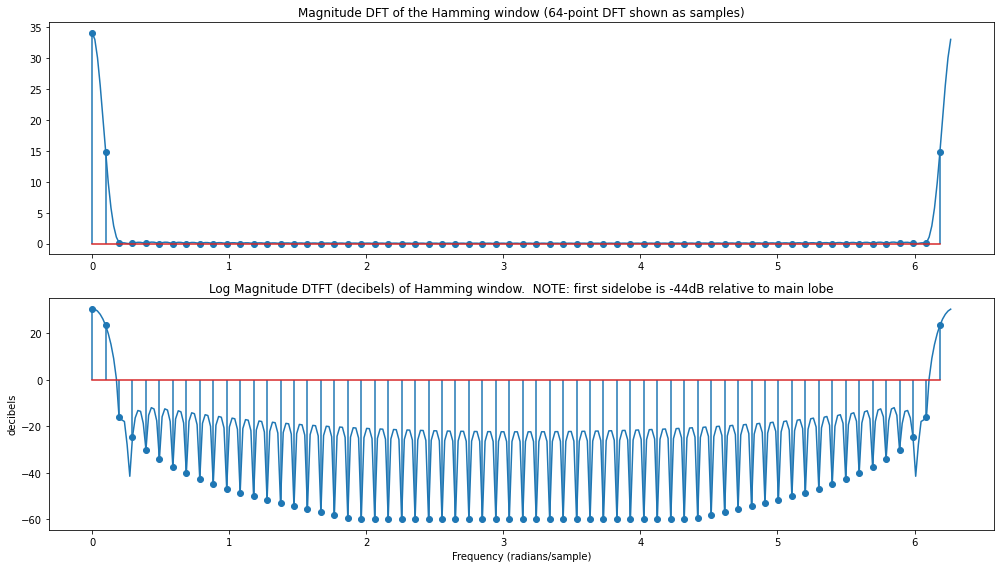

In [12]:
W_H_DTFT = np.abs(np.fft.fft(w_H_zp))
W_H_DFT = np.abs(np.fft.fft(w_H))
fig, axs = plt.subplots(2,1,figsize=(14,8))
axs[0].plot(omega, W_H_DTFT)
axs[0].stem(omega_k, W_H_DFT)
axs[0].set_title('Magnitude DFT of the Hamming window (64-point DFT shown as samples)')
axs[1].plot(omega, 20*np.log10(np.maximum(0.001,W_H_DTFT)))
axs[1].stem(omega_k, 20*np.log10(np.maximum(0.001, W_H_DFT)))
axs[1].set_title('Log Magnitude DTFT (decibels) of Hamming window.  NOTE: first sidelobe is -44dB relative to main lobe')
axs[1].set_ylabel('decibels')
axs[1].set_xlabel('Frequency (radians/sample)')
fig.tight_layout()

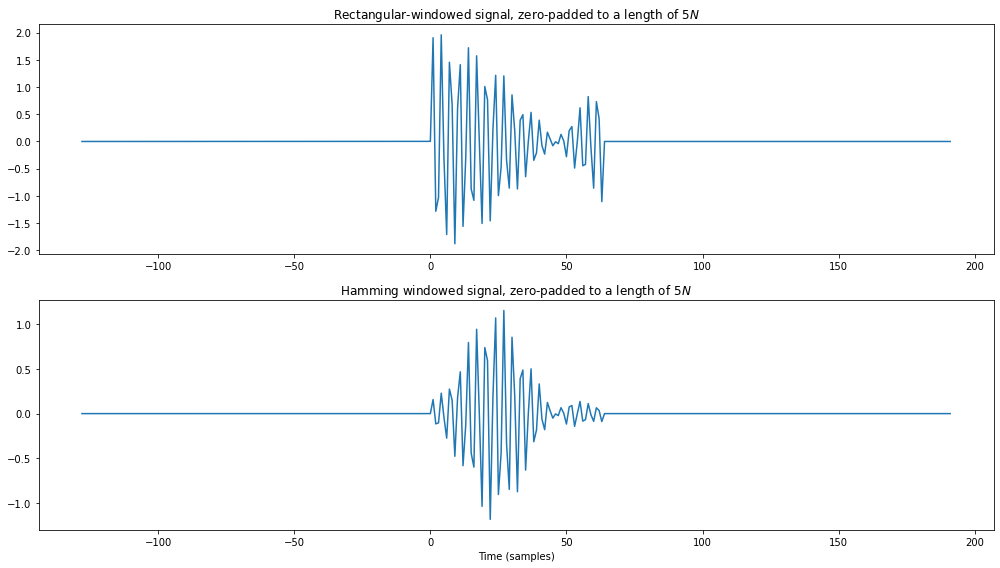

In [13]:
signal_hamming = w_H*signal
signal_hamming_zp = np.concatenate((np.zeros(2*N), signal_hamming, np.zeros(2*N)))
fig,axs = plt.subplots(2,1,figsize=(14,8))
axs[0].plot(n_axis,zero_padded_signal)
axs[0].set_title('Rectangular-windowed signal, zero-padded to a length of $5N$')
axs[1].plot(n_axis, signal_hamming_zp)
axs[1].set_title('Hamming windowed signal, zero-padded to a length of $5N$')
axs[1].set_xlabel('Time (samples)')
fig.tight_layout()

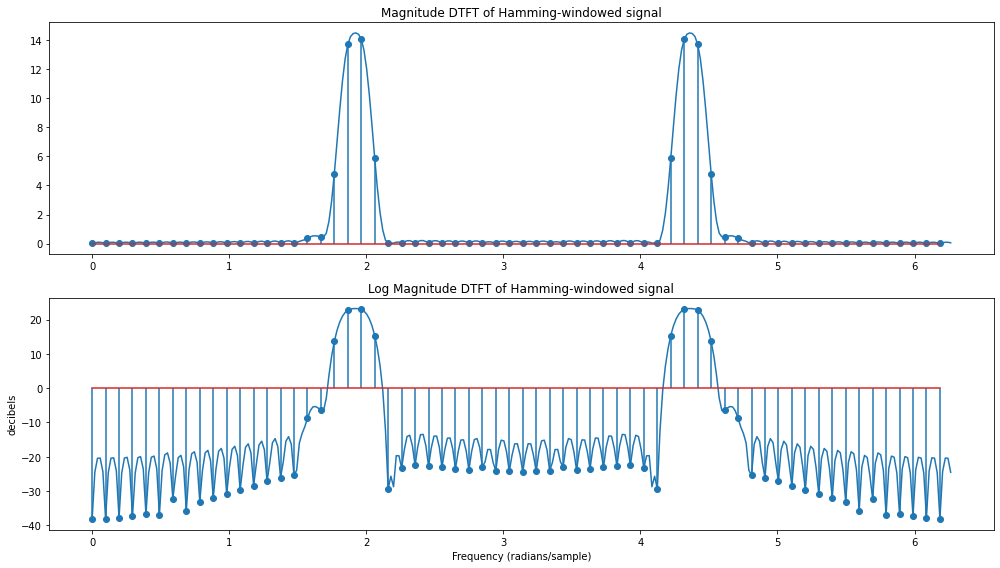

In [14]:
X_H_DTFT = np.abs(np.fft.fft(signal_hamming_zp))
X_H_DFT = np.abs(np.fft.fft(signal_hamming))
fig,axs = plt.subplots(2,1,figsize=(14,8))
axs[0].plot(omega,X_H_DTFT)
axs[0].stem(omega_k,X_H_DFT)
axs[0].set_title('Magnitude DTFT of Hamming-windowed signal')
axs[1].plot(omega,20*np.log10(np.maximum(0.001,X_H_DTFT)))
axs[1].stem(omega_k, 20*np.log10(np.maximum(0.001,X_H_DFT)))
axs[1].set_title('Log Magnitude DTFT of Hamming-windowed signal')
axs[1].set_ylabel('decibels')
axs[1].set_xlabel('Frequency (radians/sample)')
fig.tight_layout()

In this plot, we can see one more frequency component that wasn't visible using the rectangular window!  It is right in between $k=16$ and $k=17$, so we could say that it's at frequency $k=16.5$.

$$\omega_1=\frac{2\pi 19}{64},~~~\omega_2=\frac{2\pi 20}{64},~~~\omega_3=\frac{2\pi 16.5}{64}$$

with amplitudes of 

$$a_1=a_2=10^{30/20},~~~a_3 = 10^{-5/20}$$

Notice that the Hamming window has a very low first sidelobe, but the **disadvantage** of the Hamming window is that its main lobe is twice as wide.  In this figure, for example, we can't see the separation between the $\omega_1$ and $\omega_2$; they look like one large peak.  We need the rectangular window to distinguish $\omega_1$ and $\omega_2$, but we need the Hamming window to detect $\omega_3$.

## 4. Hann window

A Hann window is like a Hamming window, except that it's made to taper all the way down to zero at either end:

$$w_{\mbox{Hann}}[n]=\begin{cases}0.5-0.5\cos\left(\frac{2\pi n}{N+1}\right)&0\le n\le N-1\\0&\mbox{otherwise}\end{cases}$$

Remember that the Hamming coefficients $(a,b)=(0.54,-0.46)$ were optimized for the smallest possible **first** sidelobe.  The Hann coefficients $(a,b)=(0.5,-0.5)$ will therefore have a larger **first** sidelobe, but some of the higher-frequency sidelobes will be much smaller.

In particular: 

* The Hamming window's first sidelobe is at -44dB, and all of its other sidelobes are at about the same level.

* The Hann window's first sidelobe is at only -30dB, but its distant sidelobes decay to less than -80dB.

Text(0.5, 1.0, 'Hann window, zero-padded to a length of $5N$.  Notice how it tapers all the way down to zero.')

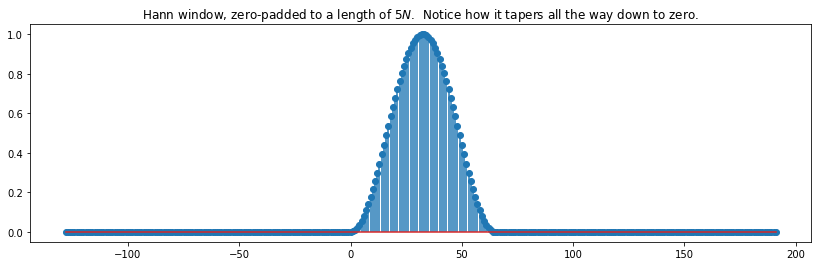

In [15]:
w_Hann = 0.5 - 0.5*np.cos(2*np.pi*np.arange(N)/(N+1))
w_Hann_zp = np.concatenate((np.zeros(2*N), w_Hann, np.zeros(2*N)))
fig,axs = plt.subplots(figsize=(14,4))
axs.stem(n_axis, w_Hann_zp)
axs.set_title('Hann window, zero-padded to a length of $5N$.  Notice how it tapers all the way down to zero.')


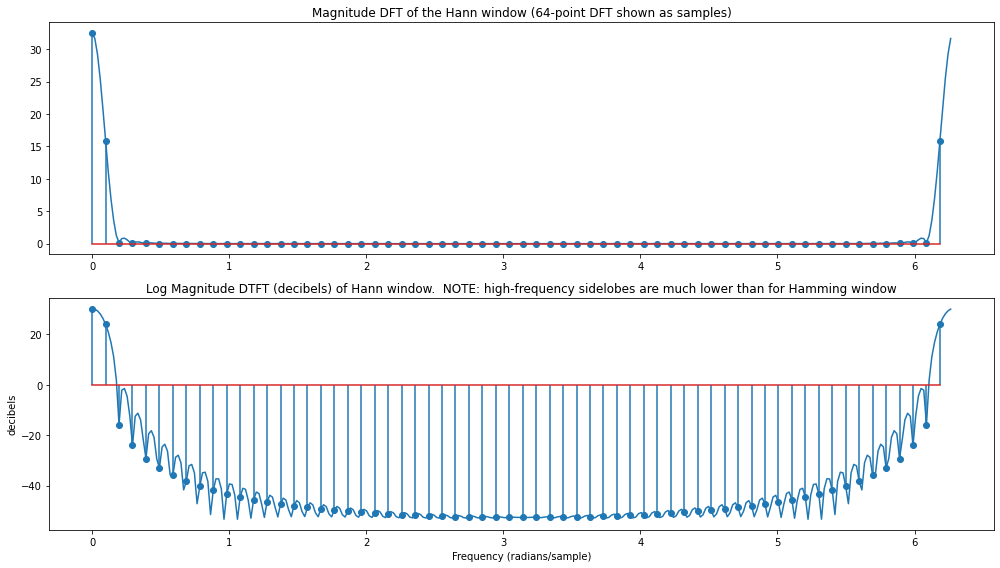

In [16]:
W_Hann_DTFT = np.abs(np.fft.fft(w_Hann_zp))
W_Hann_DFT = np.abs(np.fft.fft(w_Hann))
fig, axs = plt.subplots(2,1,figsize=(14,8))
axs[0].plot(omega, W_Hann_DTFT)
axs[0].stem(omega_k, W_Hann_DFT)
axs[0].set_title('Magnitude DFT of the Hann window (64-point DFT shown as samples)')
axs[1].plot(omega, 20*np.log10(np.maximum(0.001,W_Hann_DTFT)))
axs[1].stem(omega_k, 20*np.log10(np.maximum(0.001, W_Hann_DFT)))
axs[1].set_title('Log Magnitude DTFT (decibels) of Hann window.  NOTE: high-frequency sidelobes are much lower than for Hamming window')
axs[1].set_ylabel('decibels')
axs[1].set_xlabel('Frequency (radians/sample)')
fig.tight_layout()

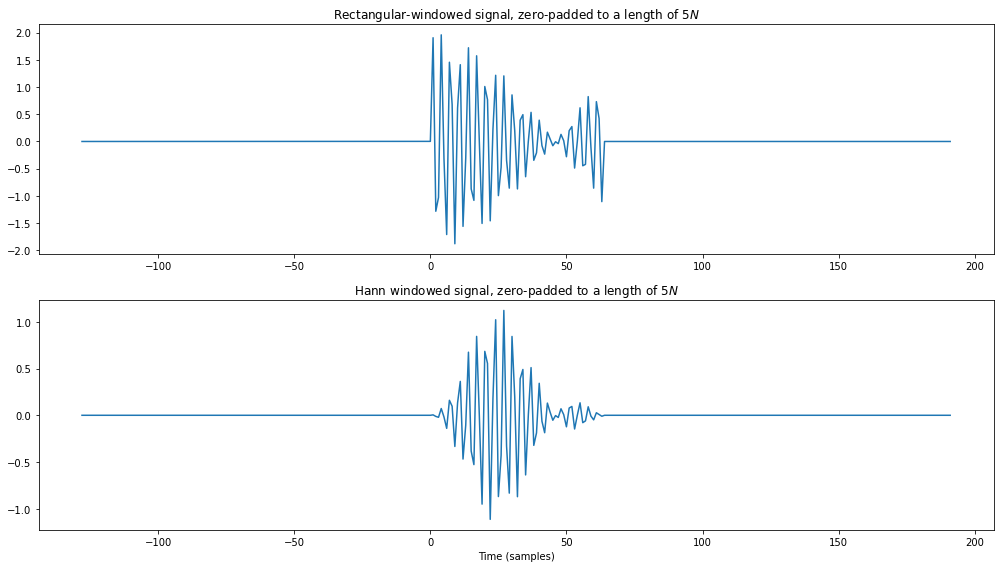

In [17]:
signal_hann = w_Hann*signal
signal_hann_zp = np.concatenate((np.zeros(2*N), signal_hann, np.zeros(2*N)))
fig,axs = plt.subplots(2,1,figsize=(14,8))
axs[0].plot(n_axis,zero_padded_signal)
axs[0].set_title('Rectangular-windowed signal, zero-padded to a length of $5N$')
axs[1].plot(n_axis, signal_hann_zp)
axs[1].set_title('Hann windowed signal, zero-padded to a length of $5N$')
axs[1].set_xlabel('Time (samples)')
fig.tight_layout()

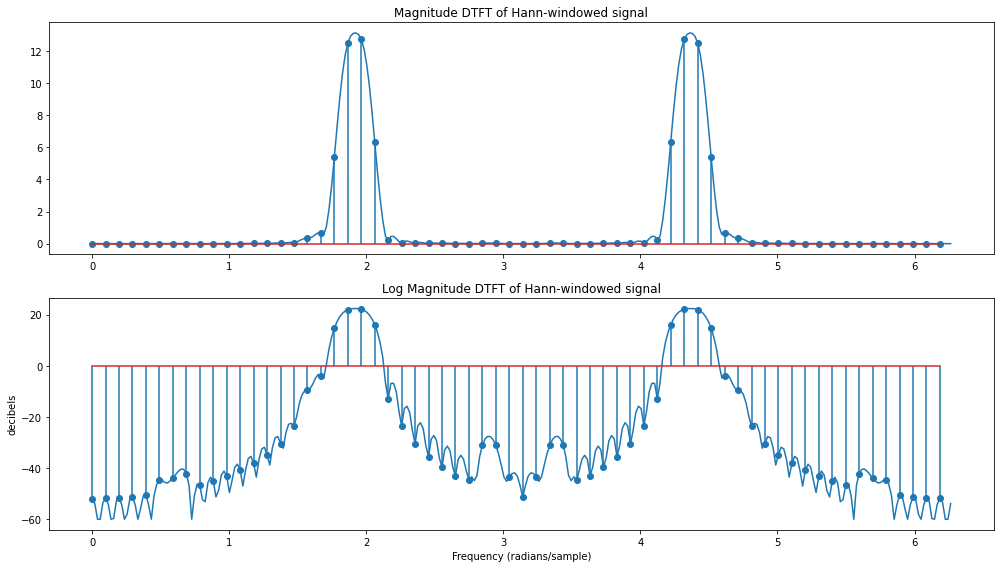

In [18]:
X_Hann_DTFT = np.abs(np.fft.fft(signal_hann_zp))
X_Hann_DFT = np.abs(np.fft.fft(signal_hann))
fig,axs = plt.subplots(2,1,figsize=(14,8))
axs[0].plot(omega,X_Hann_DTFT)
axs[0].stem(omega_k,X_Hann_DFT)
axs[0].set_title('Magnitude DTFT of Hann-windowed signal')
axs[1].plot(omega,20*np.log10(np.maximum(0.001,X_Hann_DTFT)))
axs[1].stem(omega_k, 20*np.log10(np.maximum(0.001,X_Hann_DFT)))
axs[1].set_title('Log Magnitude DTFT of Hann-windowed signal')
axs[1].set_ylabel('decibels')
axs[1].set_xlabel('Frequency (radians/sample)')
fig.tight_layout()

There's two more tones! There is certainly a tone at $k=29.5$, with a level of about -30dB.  There also seems to be another tone at about $k=6.5$, with a level of about -40dB.

$$\omega_1=\frac{2\pi 19}{64},~~\omega_2=\frac{2\pi 20}{64},~~\omega_3=\frac{2\pi 16.5}{64},~~\omega_4=\frac{2\pi 29.5}{64},~~\omega_5=\frac{2\pi 6.5}{64}$$

with amplitudes of 

$$a_1=a_2=10^{30/20},~~a_3 = 10^{-5/20},~~a_4=10^{-25/40},~~a_5=10^{-40/20}$$


## 5. Bartlett (Triangle)  Window

We don't really need another window, since we've already found all five tones, but let's try one more.

A Bartlett window, or triangle window, is just what its name says: a triangle.  For example, if $N$ is an even number, the Bartlett window can be defined as 

$$w_B[n]=\begin{cases}\min\left(\frac{2n+1}{N},\frac{2(N-n)-1}{N}\right)&0\le n\le N-1\\0&\mbox{otherwise}\end{cases}$$

Notice that a Bartlett window is the convolution of a rectangular window with itself:

$$w_{B,N}[n] = w_{R,N/2}[n] \ast w_{R,N/2}[n]$$

Therefore its DTFT is the product:

$$W_{B,N}(\omega) = W_{R,N/2}(\omega)^2$$

In particular, its sidelobes happen at frequencies like $\frac{6\pi}{N},\frac{10\pi}{N},\ldots$ instead of frequencies like $\frac{3\pi}{N},\frac{5\pi}{N},\ldots$.   Because of this, a Bartlett window can sometimes see sinusoids that are invisible using the other windows.

Text(0.5, 1.0, 'Bartlett window, zero-padded to a length of $5N$.')

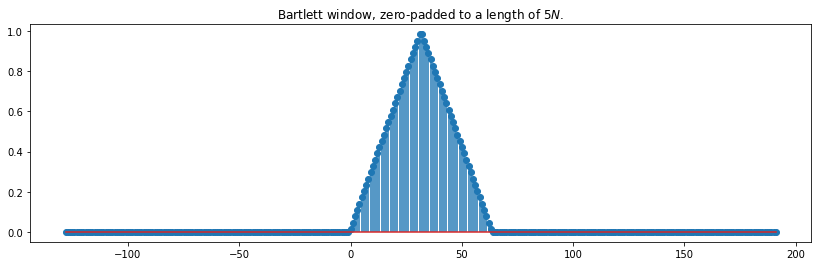

In [19]:
n = np.arange(N)
w_B = np.minimum((2*n+1)/N, (2*(N-n)-1)/N)
w_B_zp = np.concatenate((np.zeros(2*N), w_B, np.zeros(2*N)))
fig,axs = plt.subplots(figsize=(14,4))
axs.stem(n_axis, w_B_zp)
axs.set_title('Bartlett window, zero-padded to a length of $5N$.')

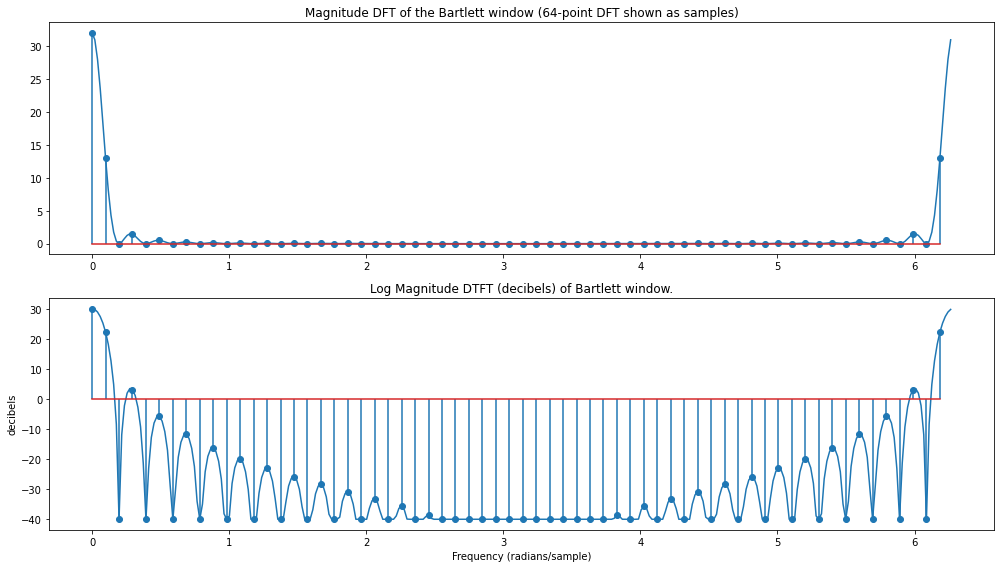

In [20]:
W_B_DTFT = np.abs(np.fft.fft(w_B_zp))
W_B_DFT = np.abs(np.fft.fft(w_B))
fig, axs = plt.subplots(2,1,figsize=(14,8))
axs[0].plot(omega, W_B_DTFT)
axs[0].stem(omega_k, W_B_DFT)
axs[0].set_title('Magnitude DFT of the Bartlett window (64-point DFT shown as samples)')
axs[1].plot(omega, 20*np.log10(np.maximum(0.01,W_B_DTFT)))
axs[1].stem(omega_k, 20*np.log10(np.maximum(0.01, W_B_DFT)))
axs[1].set_title('Log Magnitude DTFT (decibels) of Bartlett window.')
axs[1].set_ylabel('decibels')
axs[1].set_xlabel('Frequency (radians/sample)')
fig.tight_layout()

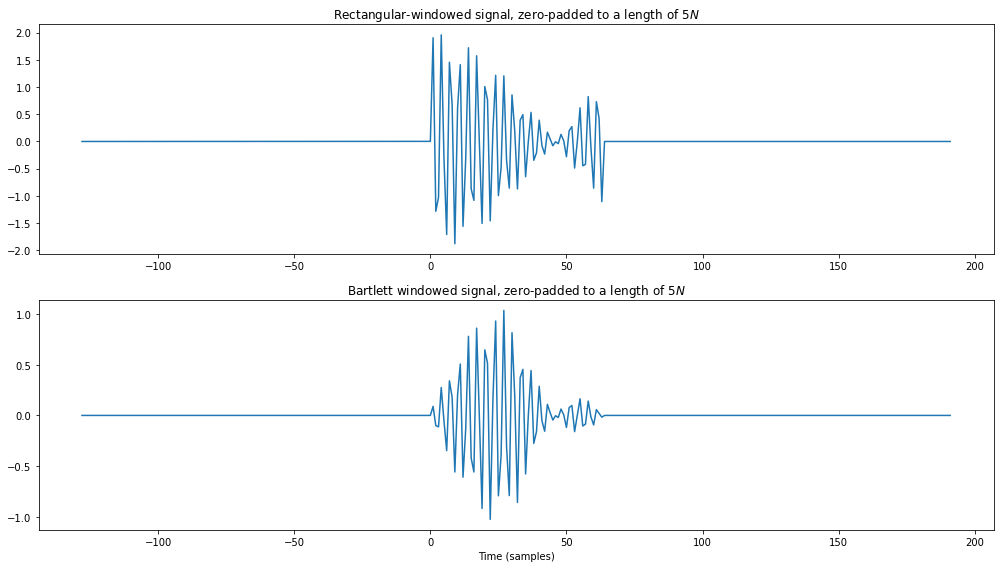

In [21]:
signal_bartlett = w_B*signal
signal_bartlett_zp = np.concatenate((np.zeros(2*N), signal_bartlett, np.zeros(2*N)))
fig,axs = plt.subplots(2,1,figsize=(14,8))
axs[0].plot(n_axis,zero_padded_signal)
axs[0].set_title('Rectangular-windowed signal, zero-padded to a length of $5N$')
axs[1].plot(n_axis, signal_bartlett_zp)
axs[1].set_title('Bartlett windowed signal, zero-padded to a length of $5N$')
axs[1].set_xlabel('Time (samples)')
fig.tight_layout()

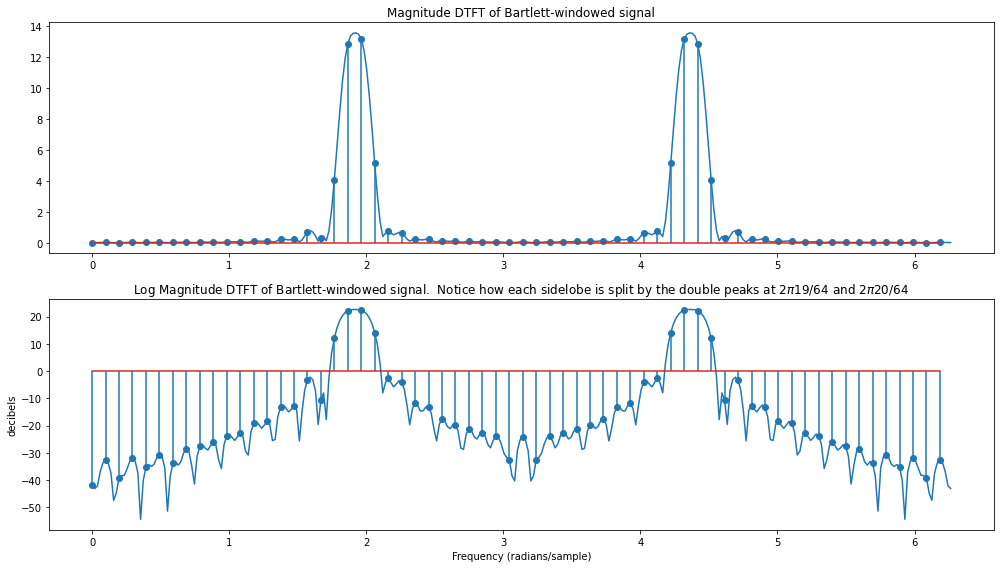

In [22]:
X_B_DTFT = np.abs(np.fft.fft(signal_bartlett_zp))
X_B_DFT = np.abs(np.fft.fft(signal_bartlett))
fig,axs = plt.subplots(2,1,figsize=(14,8))
axs[0].plot(omega,X_B_DTFT)
axs[0].stem(omega_k,X_B_DFT)
axs[0].set_title('Magnitude DTFT of Bartlett-windowed signal')
axs[1].plot(omega,20*np.log10(np.maximum(0.001,X_B_DTFT)))
axs[1].stem(omega_k, 20*np.log10(np.maximum(0.001,X_B_DFT)))
axs[1].set_title('Log Magnitude DTFT of Bartlett-windowed signal.  Notice how each sidelobe is split by the double peaks at $2\pi 19/64$ and $2\pi 20/64$')
axs[1].set_ylabel('decibels')
axs[1].set_xlabel('Frequency (radians/sample)')
fig.tight_layout()